# Exercise 5 d)

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
#Load all the data
symbols = open("symbols.txt", "r").read()
symbols = symbols.replace("\n", "") #Replace \n with space

encrypted_message = open("message.txt", "r").read()

war_and_peace = open("war_and_peace.txt", "r").read()
war_and_peace = war_and_peace.replace("\n", "").lower() #Replace \n with space and make all the letters lowercase

Initialise $\sigma$

In [107]:
first_sigma = dict() #Given a non-encrypted symbol (key in dictionary), return the encrypted version of the symbol (value in dictionary)

#Initialisation strategies are discussed in the report
for symbol in symbols:
    first_sigma[symbol] = symbol
first_sigma

{'=': '=',
 ' ': ' ',
 '-': '-',
 ',': ',',
 ';': ';',
 ':': ':',
 '!': '!',
 '?': '?',
 '/': '/',
 '.': '.',
 "'": "'",
 '"': '"',
 '(': '(',
 ')': ')',
 '[': '[',
 ']': ']',
 '*': '*',
 '0': '0',
 '1': '1',
 '2': '2',
 '3': '3',
 '4': '4',
 '5': '5',
 '6': '6',
 '7': '7',
 '8': '8',
 '9': '9',
 'a': 'a',
 'b': 'b',
 'c': 'c',
 'd': 'd',
 'e': 'e',
 'f': 'f',
 'g': 'g',
 'h': 'h',
 'i': 'i',
 'j': 'j',
 'k': 'k',
 'l': 'l',
 'm': 'm',
 'n': 'n',
 'o': 'o',
 'p': 'p',
 'q': 'q',
 'r': 'r',
 's': 's',
 't': 't',
 'u': 'u',
 'v': 'v',
 'w': 'w',
 'x': 'x',
 'y': 'y',
 'z': 'z'}

Define functions to run MCMC.
\
\
Functions being defined:
- Function that returns a new proposed sigma prime
- Given a sigma, decrypt the message
- Return the likelihood for the decrypted message to be in the English language.
- Same transition matrix used in subsection a)

In [108]:
def proposed_sigma(symbols_text, sigma):
    """ 
    Function that returns a new proposed sigma prime
    """
    sigma_instance = sigma.copy()

    #Choose two random symbols, must be different
    #Choose random indexes, if same, repeat
    first_index = np.random.randint(0,len(symbols_text))
    second_index = np.random.randint(0,len(symbols_text))
    if first_index == second_index:
        proposed_sigma(symbols_text,sigma_instance)
    else:
        #Acquire the two random symbols out of the two random indexes
        first_symbol = sigma_instance[symbols_text[first_index]]
        second_symbol = sigma_instance[symbols_text[second_index]]

        #Replace symbols accordingly
        sigma_instance[symbols_text[first_index]] = second_symbol
        sigma_instance[symbols_text[second_index]] = first_symbol

    return sigma_instance
    

def decrypt_message(encrypted_message, sigma):
    """ 
    Given a sigma, decrypt the message
    """
    # Thus, we need to know what key is the value for (the way the dictionary is built, sigma.keys are decrypted symbols
    # sigma.values are the respective encrypted symbols)
    decrypted_message_list = []
    decrypted_message = str()
    for letter in encrypted_message:
        index_encrypted_symbol = list(sigma.values()).index(letter)
        decrypted_message_list.append(list(sigma.keys())[index_encrypted_symbol])

    for letter in decrypted_message_list:
        decrypted_message += letter

    return decrypted_message


def loglikelihood(encrypted_message, sigma, transition_matrix, symbols_text):
    """ 
    Return the likelihood for the decrypted message to be in the English language.
    """
    #Acquire decrypted message first
    decrypted_message = decrypt_message(encrypted_message, sigma)

    #Use loglikelihood of course
    loglikelihood = 0
    for i in range(len(encrypted_message)):
        alpha = symbols_text.index(decrypted_message[i])
        beta = symbols_text.index(decrypted_message[i-1])
        loglikelihood += np.log(transition_matrix[alpha][beta])
    return loglikelihood


def Transition_Matrix(large_text, symbols):
    """ 
    Same transition matrix used in subsection a)
    """
    counting_matrix = np.zeros(shape=(len(symbols),len(symbols)))

    for i in range(len(large_text)):
        if large_text[i] in symbols and large_text[i-1] in symbols:
            beta = symbols.index(large_text[i-1])
            alpha = symbols.index(large_text[i])
            counting_matrix[alpha][beta] += 1

    transition_matrix = np.zeros(shape = (len(symbols),len(symbols)))
    for i in range(len(symbols)):
        transition_matrix[:,i] = counting_matrix[:,i]/(np.sum(counting_matrix,axis=0)[i])

    return transition_matrix

Run the MCMC algorithm

In [109]:
#Acquire transition matrix once
transition_matrix = Transition_Matrix(war_and_peace, symbols)
transition_matrix = transition_matrix + 0.0001 #Restore Ergodicity to the chain as explained in subsection e) of report

In [ ]:
iterations = 20000 #Define iterations
sigma = first_sigma.copy() #Define initialisation
log_likelihood_history = [] #Needed for graphs
for i in range(iterations):
    #Calculate likelihood with current sigma
    current_loglikelihood = loglikelihood(encrypted_message, sigma, transition_matrix, symbols)

    #Propose a new sigma
    sigma_prime = proposed_sigma(symbols, sigma).copy()

    #Calculate likelihood with proposed sigma
    proposed_loglikelihood = loglikelihood(encrypted_message, sigma_prime, transition_matrix, symbols)

    #Evaluate Rejection Kernel
    A = min(1,np.exp(proposed_loglikelihood-current_loglikelihood))

    #Keep proposed sigma according to Rejection Kernel
    if current_loglikelihood <= proposed_loglikelihood or A >= np.random.uniform(0,1):
        sigma = sigma_prime.copy()

    #Save 
    if i % 100 == 0:
        print("iteration: "+str(i))
        print(decrypt_message(encrypted_message, sigma)[0:60] + "\n")
        print(current_loglikelihood)
        log_likelihood_history.append(current_loglikelihood)


Plot some results

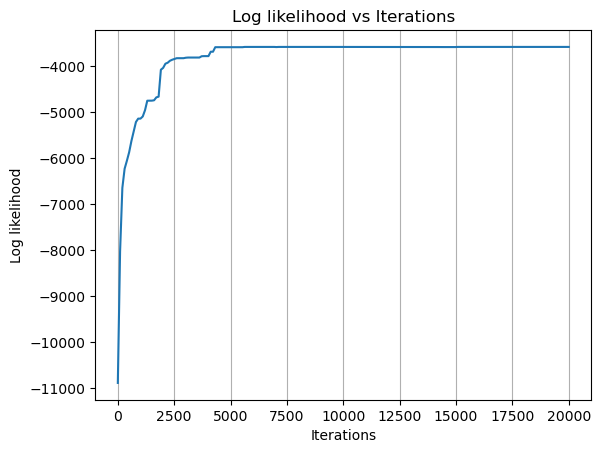

In [117]:
x = np.linspace(0,20000,200)
plt.grid(axis = "x")
plt.xlabel("Iterations")
plt.ylabel("Log likelihood")
plt.title("Log likelihood vs Iterations")
plt.plot(x, log_likelihood_history)

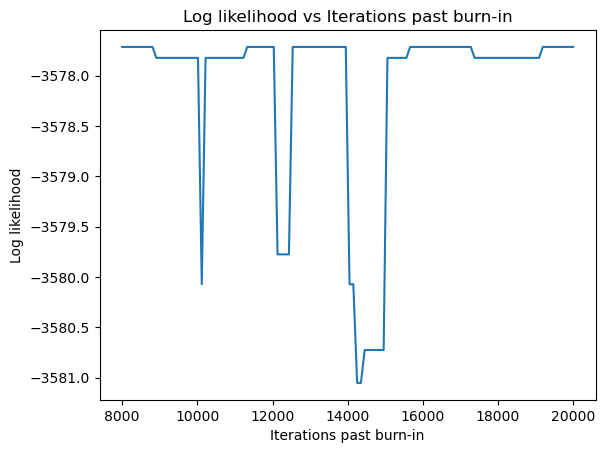

In [118]:
#We can show log likelihood vs iterations past burn-in
x = np.linspace(8000,20000,120)
y = log_likelihood_history[80:]
plt.xlabel("Iterations past burn-in")
plt.ylabel("Log likelihood")
plt.title("Log likelihood vs Iterations past burn-in")
plt.plot(x,y)